In [86]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [87]:
df = pd.read_csv(r"../../data/processed/dridex.csv")

## EDA

In [88]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(60247, 31)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [89]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,5,TCP,50.01%
1,Flags,13,"PSH,ACK",37.54%
2,Label,2,Benign,50.01%
3,Direction,2,outbound,50.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,30127,50.005809
1,TLS,30108,49.974273
2,HTTP,9,0.014939
3,IRC,2,0.003320
4,MEDIA,1,0.001660


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,"PSH,ACK",22614,37.535479
1,"FIN,SYN,ACK",18709,31.053828
2,"SYN,ACK",7512,12.468671
3,"FIN,PSH,ACK",7506,12.458712
4,"SYN,RST,ACK",3373,5.598619
5,"FIN,SYN,RST,ACK",311,0.516208
6,"FIN,SYN,PSH,ACK",187,0.310389
7,"SYN,PSH,ACK",15,0.024898
8,"SYN,RST,PSH,ACK",10,0.016598
9,SYN,5,0.008299


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,30130,50.010789
1,Dridex,30117,49.989211


---

### Column: Direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,30126,50.004150
1,inbound,30121,49.995850


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Destination Common Port Usage,Flags Count,SYN Count,ACK Count,FIN Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Mean,1.746243,3.155568e+04,3.155186e+04,4.029196,919.451525,249.201135,183.228438,87.526881,531.470712,1.749662,...,1.000593e+05,0.000183,2.508274,0.500025,0.999900,0.443458,0.000149,0.625027,0.059223,0.000216
Median,0.638203,4.919200e+04,8.343000e+03,4.000000,1137.000000,229.142857,229.211693,42.000000,711.000000,1.193895,...,6.549637e+02,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,0.016431,4.431000e+03,4.431000e+03,3.000000,182.000000,36.400000,4.800000,34.000000,46.000000,0.000000,...,1.755619e+05,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,9.129087,2.539476e+04,2.539476e+04,0.991027,913.070779,217.398950,197.778849,59.350401,533.898298,1.745895,...,7.625038e+06,0.013511,0.517009,0.500004,0.009979,0.496797,0.012222,0.484120,0.236043,0.014688
Variance,83.340234,6.448938e+08,6.448941e+08,0.982134,833698.247986,47262.303390,39116.473230,3522.470109,285047.392392,3.048150,...,5.814120e+13,0.000183,0.267298,0.250004,0.000100,0.246807,0.000149,0.234372,0.055716,0.000216
Range,257.057723,6.417500e+04,6.417500e+04,37.000000,52787.000000,1356.026316,630.485527,1134.000000,1460.000000,3.583603,...,1.168000e+09,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,0.000001,8.000000e+01,8.000000e+01,1.000000,34.000000,34.000000,0.000000,34.000000,34.000000,0.000000,...,8.188486e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,257.057724,6.425500e+04,6.425500e+04,38.000000,52821.000000,1390.026316,630.485527,1168.000000,1494.000000,3.583603,...,1.168000e+09,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Destination Common Port Usage,Flags Count,SYN Count,ACK Count,FIN Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Duration,1.000000,-0.011393,-0.005378,0.014311,-0.063297,-0.063530,-0.056493,-0.056516,-0.060822,-0.064404,...,-0.002497,0.038379,0.027994,0.065209,-0.006289,0.005477,-0.002338,-0.009577,-0.047534,-0.002810
Source Port,-0.011393,1.000000,-0.982354,-0.236167,-0.277295,-0.156632,-0.296294,0.281257,-0.273002,-0.010559,...,-0.006756,0.012468,0.011931,0.000084,-0.008635,-0.111822,-0.000313,0.747897,-0.267236,-0.003310
Destination Port,-0.005378,-0.982354,1.000000,0.213545,0.263287,0.154263,0.291648,-0.290335,0.265388,0.010568,...,0.003238,-0.016748,-0.013264,-0.000067,0.009662,0.120090,-0.002938,-0.767750,0.248256,-0.001396
Packets,0.014311,-0.236167,0.213545,1.000000,-0.066157,-0.392810,-0.288454,-0.576441,-0.254417,-0.528624,...,-0.034147,-0.007836,0.782940,0.538622,0.013721,0.676129,-0.037362,-0.238489,0.239964,-0.044905
Bytes,-0.063297,-0.277295,0.263287,-0.066157,1.000000,0.912289,0.921521,0.581187,0.949245,0.820780,...,-0.000255,-0.009709,-0.085994,-0.811535,0.008767,0.009414,-0.007811,-0.107753,0.539022,-0.008214
Mean Payload Size,-0.063530,-0.156632,0.154263,-0.392810,0.912289,1.000000,0.971012,0.763003,0.977592,0.972886,...,0.024008,-0.004704,-0.362245,-0.968732,0.009471,-0.252529,0.004880,-0.087186,0.378854,0.010793
Std Payload Size,-0.056493,-0.296294,0.291648,-0.288454,0.921521,0.971012,1.000000,0.620277,0.993827,0.905301,...,-0.008381,-0.012362,-0.261226,-0.897803,0.009167,-0.160815,-0.011324,-0.208418,0.407912,-0.013610
Min Payload Size,-0.056516,0.281257,-0.290335,-0.576441,0.581187,0.763003,0.620277,1.000000,0.648615,0.869293,...,0.111980,0.019151,-0.536200,-0.876655,0.007880,-0.440526,0.051174,0.213875,0.069307,0.079556
Max Payload Size,-0.060822,-0.273002,0.265388,-0.254417,0.949245,0.977592,0.993827,0.648615,1.000000,0.910233,...,0.005328,-0.008970,-0.229178,-0.903026,0.009112,-0.126391,-0.004475,-0.161064,0.448570,-0.003372
Mean Entropy,-0.064404,-0.010559,0.010568,-0.528624,0.820780,0.972886,0.905301,0.869293,0.910233,1.000000,...,0.012202,-0.001949,-0.491324,-0.999502,0.010002,-0.383428,0.010787,-0.007632,0.255575,0.009044


### Correlation Matrix Heatmap:

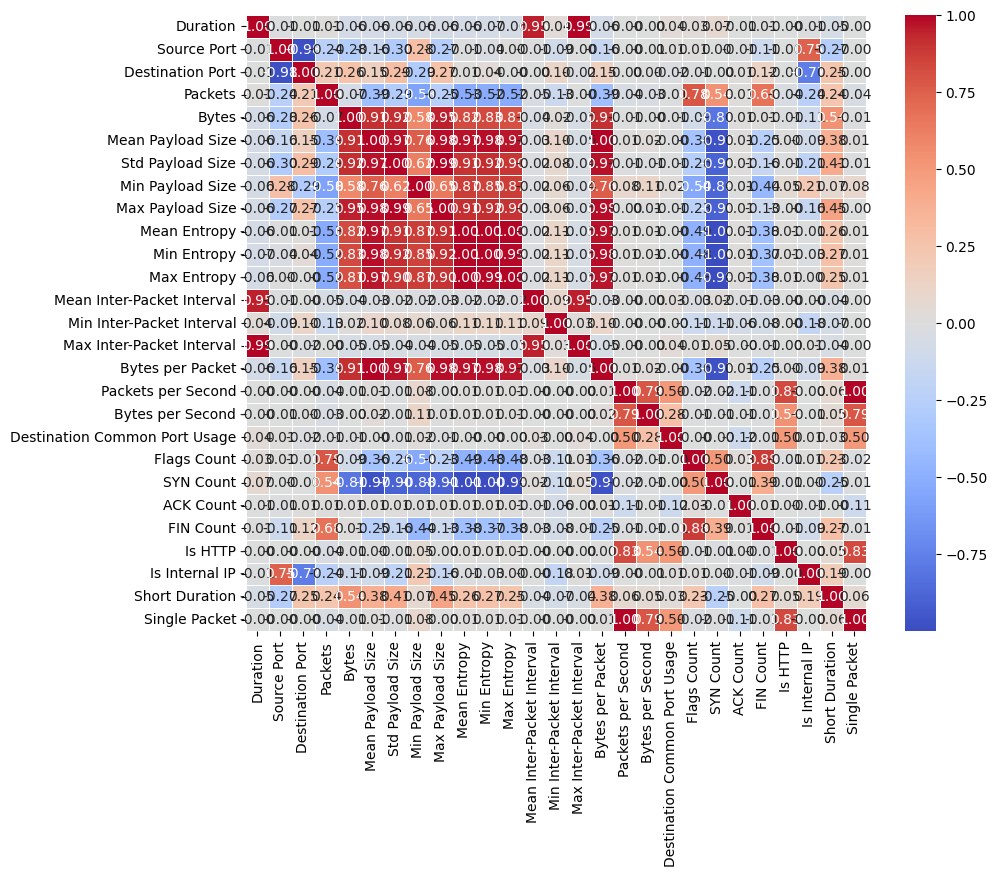

In [90]:
info.numerical_summary()

## Modeling

In [91]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [92]:
encoder = LabelEncoder()

columns_to_encode = ["Protocol", "Flags", "Label", "Direction"]

for column in columns_to_encode:
    path = "../../variables/dridex/" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [93]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["Flags Count"] = df["Flags Count"].astype("float64")

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Columns to impute
columns_to_impute = [
    "Mean Payload Size",
    "Std Payload Size",
    "Min Payload Size",
    "Max Payload Size",
    "Mean Entropy",
    "Min Entropy",
    "Max Entropy",
    "Mean Inter-Packet Interval",
    "Min Inter-Packet Interval",
    "Max Inter-Packet Interval",
]

# Copy dataframe excluding the columns to impute
df_imputation = df.copy()

# Initialize Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply imputation per label where Packets > 1
for column in columns_to_impute:
    for label in df["Label"].unique():
        # Create boolean mask
        label_mask = (df_imputation["Label"] == label) & (df_imputation["Packets"] > 1)

        # Extract subset of data
        label_df = df_imputation.loc[label_mask, columns_to_impute].copy()

        # Replace zeros with NaN (assuming zero is missing data)
        label_df[column] = label_df[column].replace(0, np.nan)

        # Fit and transform only the selected column
        imputed_data = imputer.fit_transform(label_df)

        # Assign imputed values back
        df_imputation.loc[label_mask, column] = imputed_data[
            :, columns_to_impute.index(column)
        ]

# Final dataframe after imputation
df = df_imputation.copy()

### Data Splitting

In [95]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)
path = "../../variables/dridex/" + "scaler"
save_as_pickle(path, scaler)
df["Label"] = label_column

## Models

### Model Creation and Parameters

In [96]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_estimators = 7
dt_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [97]:
df_reset = df.reset_index(drop=True)
X = df_reset.drop("Label", axis=1)
y = df["Label"]

### KNN

In [98]:
dt_normal = prisma.MachineLearning()
dt_normal_metrics, avg_dt_normal_metrics, dt_normal_model = (
    dt_normal.evaluate_model(X, y, test_size, iterations, dt_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


### Random Forest

In [99]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model: 100%|██████████| 30/30 [01:58<00:00,  3.94s/it]


### Logistic Regression

In [100]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:11<00:00,  2.71it/s]


In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

X_lstm = np.expand_dims(X, axis=1)

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential(
    [
        LSTM(
            128,
            input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
            return_sequences=True,
        ),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(
            y.shape[1] if len(y.shape) > 1 else 1,
            activation="sigmoid",
        ),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=200,
    batch_size=64,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/200


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


754/754 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8819 - loss: 0.2738 - val_accuracy: 0.9364 - val_loss: 0.0917
Epoch 2/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9401 - loss: 0.0923 - val_accuracy: 0.9368 - val_loss: 0.0881
Epoch 3/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9444 - loss: 0.0892 - val_accuracy: 0.9588 - val_loss: 0.0817
Epoch 4/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9494 - loss: 0.0875 - val_accuracy: 0.9772 - val_loss: 0.0559
Epoch 5/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9724 - loss: 0.0642 - val_accuracy: 0.9794 - val_loss: 0.0521
Epoch 6/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9848 - loss: 0.0432 - val_accuracy: 0.9904 - val_loss: 0.0247
Epoch 7/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.9954 - val_loss: 0.0197
Epoch 8/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9910

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:


<Figure size 800x600 with 0 Axes>

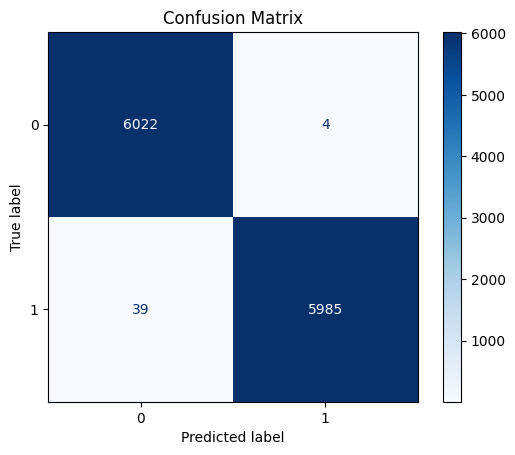

In [112]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
y_pred_lstm = model.predict(X_test_lstm)

# Convert predictions to binary labels (for binary classification)
y_pred_binary = (y_pred_lstm > 0.5).astype(int).flatten()

print("\nClassification Report:")
report_dict = classification_report(y_test_lstm, y_pred_binary, output_dict=True)

lstm_metrics = {
    "Precision": report_dict["1"]["precision"],  # Precision for class 1 (malicious)
    "Recall": report_dict["1"]["recall"],  # Recall for class 1 (malicious)
    "F1 Score": report_dict["1"]["f1-score"],  # F1-score for class 1 (malicious)
    "Accuracy": accuracy_score(y_test_lstm, y_pred_binary),  # Overall accuracy
}

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_lstm, y_pred_binary)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [113]:
confusion_matrix(y_test_lstm, y_pred_binary)

array([[6022,    4],
       [  39, 5985]])

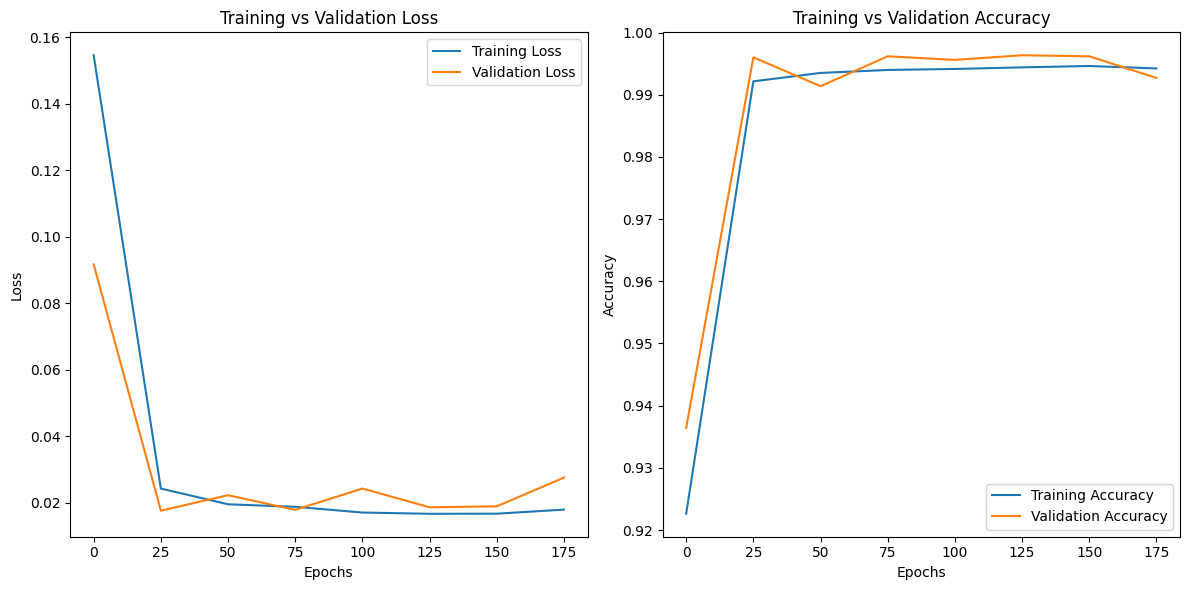

In [105]:
epochs = len(history.history["loss"])
epoch_ticks = np.arange(0, epochs, 25)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_ticks, history.history["loss"][::25], label="Training Loss")
plt.plot(epoch_ticks, history.history["val_loss"][::25], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epoch_ticks)
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epoch_ticks, history.history["accuracy"][::25], label="Training Accuracy")
plt.plot(epoch_ticks,history.history["val_accuracy"][::25], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epoch_ticks)
plt.legend()

plt.tight_layout()
plt.show()

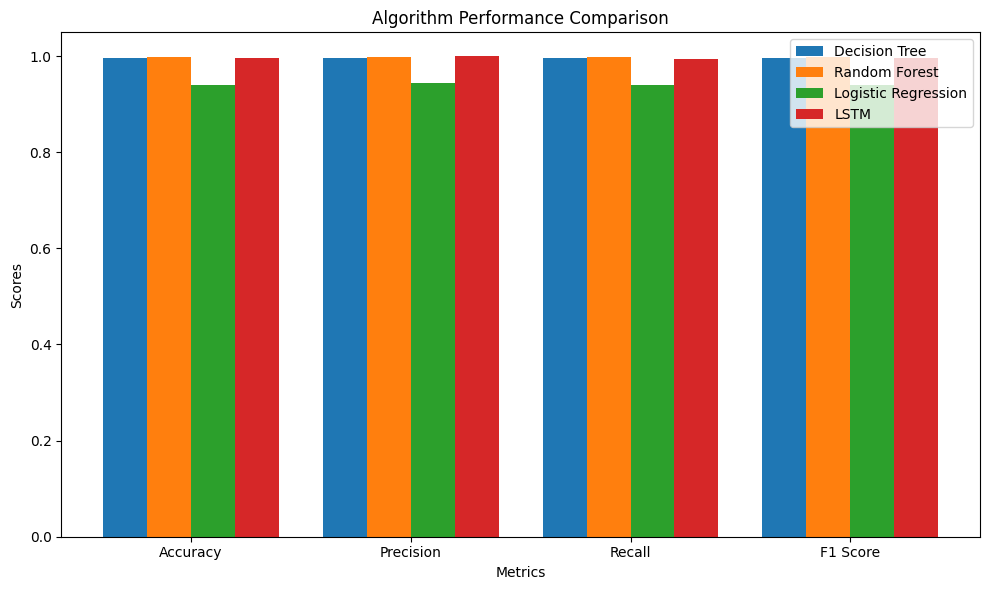

In [114]:
normal_metrics = {
    "Decision Tree": avg_dt_normal_metrics,
    "Random Forest": avg_rf_normal_metrics,
    "Logistic Regression": avg_logreg_normal_metrics,
    "LSTM": lstm_metrics,
}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [116]:
res_df = pd.DataFrame(normal_metrics)
res_df

,Decision Tree,Random Forest,Logistic Regression,LSTM
Accuracy,0.996,0.997,0.939,0.996432
Precision,0.996,0.997,0.943,0.999332
Recall,0.996,0.997,0.939,0.993526
F1 Score,0.996,0.997,0.939,0.996421


In [106]:
model.save("../../models/dridex/LSTM.h5")

In [107]:
save_as_pickle("../../models/dridex/logreg.pkl",logreg_normal_model)

In [111]:
normal_metrics

{'Decision Tree': {'Accuracy': 0.996,
  'Precision': 0.996,
  'Recall': 0.996,
  'F1 Score': 0.996},
 'Random Forest': {'Accuracy': 0.997,
  'Precision': 0.997,
  'Recall': 0.997,
  'F1 Score': 0.997},
 'Logistic Regression': {'Accuracy': 0.939,
  'Precision': 0.943,
  'Recall': 0.939,
  'F1 Score': 0.939},
 'LSTM': {'precision': 0.9993321088662548,
  'recall': 0.9935258964143426,
  'f1_score': 0.9964205444102222,
  'accuracy': 0.9964315352697095}}